In [ ]:
import os
import json
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


## Read Data From Kaggle

DO NOT RUN THIS IN VSCODE
1. Go to this [Kaggle link](https://www.kaggle.com) and create a Kaggle account if you do not have one.
2. Go to Account and click on "Create New API Token" to get the API key in the form of a json file `kaggle.json`
3. Upload the `kaggle.json` file to the default location in your Google Drive
4. Follow the instructions below

In [3]:
# os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [4]:
# !kaggle datasets download -d irkaal/foodcom-recipes-and-reviews

In [5]:
#!unzip \*.zip  && rm *.zip


In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

## Recipes Dataset
https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews/data


In [38]:
recipes_df = pd.read_csv('recipes.csv')

In [8]:
recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [9]:
recipes_df.head(20)

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."
5,43,Best Blackbottom Pie,34879,Barefoot Beachcomber,PT2H,PT20M,PT2H20M,1999-08-21T10:35:00Z,Make and share this Best Blackbottom Pie recip...,character(0),...,10.9,94.3,267.6,58.0,1.8,42.5,7.0,8.0,1 9-inch pie,"c(""Graham Cracker Crust: In small bowl, combin..."
6,44,Warm Chicken A La King,1596,Joan Edington,PT3M,PT35M,PT38M,1999-09-17T04:47:00Z,I copied this one out of a friend's book so ma...,"""https://img.sndimg.com/food/image/upload/w_55...",...,31.9,405.8,557.2,29.1,3.1,5.0,45.3,2.0,NaN,"c(""Melt 1 1/2 ozs butter, add the flour and co..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,1580,tristitia,PT50M,PT30M,PT1H20M,1999-08-06T00:40:00Z,Make and share this Buttermilk Pie With Ginger...,"""https://img.sndimg.com/food/image/upload/w_55...",...,1.7,24.5,281.8,37.5,0.5,24.7,4.2,8.0,NaN,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
8,46,A Jad - Cucumber Pickle,1533,Dancer,NaN,PT25M,PT25M,1999-08-11T19:48:00Z,Make and share this A Jad - Cucumber Pickle re...,character(0),...,0.0,0.0,0.7,1.1,0.2,0.2,0.1,NaN,1 cup,"c(""Slice the cucumber in four lengthwise, then..."
9,47,Butter Pecan Cookies,1573,benluc,PT9M,PT55M,PT1H4M,1999-09-07T09:01:00Z,Make and share this Butter Pecan Cookies recip...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.4,6.3,15.0,4.5,0.6,1.6,0.8,NaN,84 cookies,"c(""Preheat oven to 350 degrees."", ""Cream butte..."


In [10]:
recipes_df.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

In [39]:
# delete columns: aggregated rating, review count, recipe servings, recipe yield
# these are the rolumns with a large number of nulls and irrelavent to this project
recipes_df_small = recipes_df.drop(columns=['AggregatedRating', 'ReviewCount', 'RecipeServings', 'RecipeYield'])

In [40]:
recipes_df_cleaned = recipes_df_small.dropna().reset_index(drop=True)
recipes_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424554 entries, 0 to 424553
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    424554 non-null  int64  
 1   Name                        424554 non-null  object 
 2   AuthorId                    424554 non-null  int64  
 3   AuthorName                  424554 non-null  object 
 4   CookTime                    424554 non-null  object 
 5   PrepTime                    424554 non-null  object 
 6   TotalTime                   424554 non-null  object 
 7   DatePublished               424554 non-null  object 
 8   Description                 424554 non-null  object 
 9   Images                      424554 non-null  object 
 10  RecipeCategory              424554 non-null  object 
 11  Keywords                    424554 non-null  object 
 12  RecipeIngredientQuantities  424554 non-null  object 
 13  RecipeIngredie

In [41]:
recipes_df_cleaned.shape

(424554, 24)

In [14]:
recipes_df_cleaned.head(10)

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."
5,43,Best Blackbottom Pie,34879,Barefoot Beachcomber,PT2H,PT20M,PT2H20M,1999-08-21T10:35:00Z,Make and share this Best Blackbottom Pie recip...,character(0),...,437.9,19.3,10.9,94.3,267.6,58.0,1.8,42.5,7.0,"c(""Graham Cracker Crust: In small bowl, combin..."
6,44,Warm Chicken A La King,1596,Joan Edington,PT3M,PT35M,PT38M,1999-09-17T04:47:00Z,I copied this one out of a friend's book so ma...,"""https://img.sndimg.com/food/image/upload/w_55...",...,895.5,66.8,31.9,405.8,557.2,29.1,3.1,5.0,45.3,"c(""Melt 1 1/2 ozs butter, add the flour and co..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,1580,tristitia,PT50M,PT30M,PT1H20M,1999-08-06T00:40:00Z,Make and share this Buttermilk Pie With Ginger...,"""https://img.sndimg.com/food/image/upload/w_55...",...,228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
8,47,Butter Pecan Cookies,1573,benluc,PT9M,PT55M,PT1H4M,1999-09-07T09:01:00Z,Make and share this Butter Pecan Cookies recip...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,69.0,5.6,1.4,6.3,15.0,4.5,0.6,1.6,0.8,"c(""Preheat oven to 350 degrees."", ""Cream butte..."
9,49,Chicken Breasts Lombardi,174711,Queen Dragon Mom,PT30M,PT45M,PT1H15M,1999-08-14T19:58:00Z,Make and share this Chicken Breasts Lombardi r...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,627.7,24.9,13.0,203.0,848.9,13.7,0.6,2.0,57.9,"c(""Cook mushrooms in 2 tbsp butter in a large ..."


So, in this recipe dataset, we have 424,554 valid rows and 24 columns.

In [5]:
# check if all total time values begin with "PT"
recipes_df_cleaned['TotalTime'].str.startswith('PT').all()
recipes_df_cleaned['PrepTime'].str.startswith('PT').all()
recipes_df_cleaned['CookTime'].str.startswith('PT').all()

True

In [42]:
# Convert total time, prep time, cook time to integers representing minutes
# Function to convert duration to minutes
def convert_to_minutes(duration):
    hours = 0
    minutes = 0
    if 'H' in duration:
        hours = int(duration.split('PT')[1].split('H')[0])
    if 'M' in duration:
        minutes_part = duration.split('H')[-1]  # Get the part after 'H' if it exists
        minutes = int(minutes_part.replace('PT', '').replace('M', ''))  # Remove 'PT' and 'M'
    return hours * 60 + minutes

recipes_df_cleaned['TotalTime'] = recipes_df_cleaned['TotalTime'].apply(convert_to_minutes)
recipes_df_cleaned['PrepTime'] = recipes_df_cleaned['PrepTime'].apply(convert_to_minutes)
recipes_df_cleaned['CookTime'] = recipes_df_cleaned['CookTime'].apply(convert_to_minutes)



In [43]:
# Convert DatePublished to datetime format
recipes_df_cleaned['DatePublished'] = pd.to_datetime(recipes_df_cleaned['DatePublished'])


In [44]:
# Function to convert the ingredients string into a list, seprated by commas
def convert_to_list(ing):
    # Remove the `c(` prefix and trailing `)`
    ing = ing.strip('c()')
    # Split by comma, strip quotes and spaces from each ingredient
    return [item.strip().strip('"') for item in ing.split(',')]

# Apply the function to each row in the Ingredients column
recipes_df_cleaned['Ingredients'] = recipes_df_cleaned['RecipeIngredientParts'].apply(convert_to_list)

In [45]:
recipes_df_cleaned['Keywords'] = recipes_df_cleaned['Keywords'].apply(convert_to_list)

In [46]:
recipes_df_cleaned['RecipeInstructions'] = recipes_df_cleaned['RecipeInstructions'].apply(convert_to_list)

In [47]:
# Convert ingredient quantities column to a list of quantities, separated by commas
recipes_df_cleaned['Ingr_Quantities'] = recipes_df_cleaned['RecipeIngredientQuantities'].apply(convert_to_list)

recipes_df_cleaned['Ingr_Quantities'].head(10)

0                                       [4, 1/4, 1, 1]
1    [1, 4, 2, 2, 8, 1/4, 8, 1/2, 1, 1, 1/4, 1/4, 1...
2                       [1 1/2, 1, NA, 1 1/2, NA, 3/4]
3    [12, 1, 2, 1, 10, 1, 3, 2, 2, 2, 1, 2, 1/2, 1/...
4                                     [46, 4, 1, 2, 1]
5    [1 1/4, 1/4, 6, 1/3, 1/4, 1/4, 2, 3, 1, 1, 1/4...
6    [12, 2, 3, 450, 1, 2, 1/4, 1, NA, NA, 2, 2, 1,...
7               [3/4, 1, 1, 2, 3, 1/4, 1, 1/2, 1/2, 2]
8                            [3/4, 1/2, 1, 1, 1, 2, 1]
9    [2, 2, 12, 1/2, 1/3, 3/4, 1/2, 1/2, 1/2, 1/2, ...
Name: Ingr_Quantities, dtype: object

In [50]:
# Function to strip the images string to url string
def parse_urls(image_string):
    # Check if image_string is 'character(0)'
    if image_string.strip() == 'character(0)':
        # Return an empty list if there are no images
        return []
    # Remove leading 'c(' and trailing ')', along with any whitespace
    image_string = image_string.strip()
    if image_string.startswith('c(') and image_string.endswith(')'):
        image_string = image_string[2:-1]
    
    # Use regex to find all substrings enclosed in double quotes
    urls = re.findall(r'"(.*?)"', image_string)
    
    return urls


In [51]:
recipes_df_cleaned['Images'] = recipes_df_cleaned['Images'].apply(parse_urls)

recipes_df_cleaned['Images'].head(10)

0    [https://img.sndimg.com/food/image/upload/w_55...
1    [https://img.sndimg.com/food/image/upload/w_55...
2    [https://img.sndimg.com/food/image/upload/w_55...
3    [https://img.sndimg.com/food/image/upload/w_55...
4    [https://img.sndimg.com/food/image/upload/w_55...
5                                                   []
6    [https://img.sndimg.com/food/image/upload/w_55...
7    [https://img.sndimg.com/food/image/upload/w_55...
8    [https://img.sndimg.com/food/image/upload/w_55...
9    [https://img.sndimg.com/food/image/upload/w_55...
Name: Images, dtype: object

In [52]:
recipes_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424554 entries, 0 to 424553
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   RecipeId                    424554 non-null  int64              
 1   Name                        424554 non-null  object             
 2   AuthorId                    424554 non-null  int64              
 3   AuthorName                  424554 non-null  object             
 4   CookTime                    424554 non-null  int64              
 5   PrepTime                    424554 non-null  int64              
 6   TotalTime                   424554 non-null  int64              
 7   DatePublished               424554 non-null  datetime64[ns, UTC]
 8   Description                 424554 non-null  object             
 9   Images                      424554 non-null  object             
 10  RecipeCategory              424554 non-null 

### Summary Statistics

In [21]:
# Display basic statistics for numerical columns
summary = recipes_df_cleaned[['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']].describe()
print("Descriptive Statistics for Nutritional Facts:")
print(summary)

Descriptive Statistics for Nutritional Facts:
            Calories     FatContent  SaturatedFatContent  CholesterolContent  \
count  424554.000000  424554.000000        424554.000000       424554.000000   
mean      501.285803      25.175029             9.878956           93.471548   
std      1507.249315     120.940741            50.749734          327.730608   
min         0.000000       0.000000             0.000000            0.000000   
25%       189.800000       6.400000             1.800000            9.500000   
50%       333.200000      14.400000             5.100000           51.600000   
75%       542.900000      28.000000            11.200000          115.700000   
max    612854.600000   64368.100000         26740.600000       130456.400000   

       SodiumContent  CarbohydrateContent   FiberContent   SugarContent  \
count  424554.000000        424554.000000  424554.000000  424554.000000   
mean      747.113993            51.015751       3.921166      21.951548   
std     

In [22]:
# Distribution of Recipe Categories
print("\nDistribution of Recipe Categories:")
print(recipes_df_cleaned['RecipeCategory'].value_counts())

# Distribution of recipes by Author
print("\nTop Authors by Number of Recipes Contributed:")
print(recipes_df_cleaned['AuthorId'].value_counts().head(10))



Distribution of Recipe Categories:
RecipeCategory
Dessert                   54249
One Dish Meal             30193
Lunch/Snacks              26236
Vegetable                 22995
Breakfast                 19283
                          ...  
Gluten Free Appetizers        1
Apple Pie                     1
Broccoli Soup                 1
Potato Soup                   1
Mongolian                     1
Name: count, Length: 303, dtype: int64

Top Authors by Number of Recipes Contributed:
AuthorId
37779      6166
283251     4423
89831      3020
37449      2527
1072593    2236
1533       2104
57042      2084
883095     1981
287420     1905
232669     1710
Name: count, dtype: int64


## Reviews Dataset

In [11]:
reviews_df = pd.read_csv('reviews.csv')

In [12]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ReviewId       1401982 non-null  int64 
 1   RecipeId       1401982 non-null  int64 
 2   AuthorId       1401982 non-null  int64 
 3   AuthorName     1401982 non-null  object
 4   Rating         1401982 non-null  int64 
 5   Review         1401768 non-null  object
 6   DateSubmitted  1401982 non-null  object
 7   DateModified   1401982 non-null  object
dtypes: int64(4), object(4)
memory usage: 85.6+ MB


In [25]:
reviews_df.head(10)

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z
5,17,5221,2046,Gay Gilmore ckpt,4,"love it, but without the bean sprouts.",2000-05-08T11:08:00Z,2000-05-08T11:08:00Z
6,19,13307,2046,Gay Gilmore ckpt,5,"chewy goodness, not crispy at all. i even thre...",2000-05-21T16:59:00Z,2000-05-21T16:59:00Z
7,21,148,2156,Darlene Blythe,0,Would someone please check the Nutrition Facts...,2000-06-02T10:01:00Z,2000-06-02T10:01:00Z
8,22,517,2046,Gay Gilmore ckpt,5,thought this was terrific!,2000-02-25T09:02:00Z,2000-02-25T09:02:00Z
9,23,4684,2046,Gay Gilmore ckpt,5,this is absolutely delicious. i even served i...,2000-02-25T09:06:00Z,2000-02-25T09:06:00Z


In [26]:
reviews_df.isnull().sum()

ReviewId           0
RecipeId           0
AuthorId           0
AuthorName         0
Rating             0
Review           214
DateSubmitted      0
DateModified       0
dtype: int64

In [13]:
# drop the rows with nulls
reviews_df_cleaned = reviews_df.dropna().reset_index(drop=True)


In [28]:
reviews_df_cleaned.shape

(1401768, 8)

So, in the corresponding reviews dataset, we have 1,401,768 valid rows and 8 columns.

In [14]:
# Convert DateSubmitted and DateModified to datetime format
reviews_df_cleaned['DateSubmitted'] = pd.to_datetime(reviews_df_cleaned['DateSubmitted'])
reviews_df_cleaned['DateModified'] = pd.to_datetime(reviews_df_cleaned['DateModified'])

In [15]:
reviews_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401768 entries, 0 to 1401767
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   ReviewId       1401768 non-null  int64              
 1   RecipeId       1401768 non-null  int64              
 2   AuthorId       1401768 non-null  int64              
 3   AuthorName     1401768 non-null  object             
 4   Rating         1401768 non-null  int64              
 5   Review         1401768 non-null  object             
 6   DateSubmitted  1401768 non-null  datetime64[ns, UTC]
 7   DateModified   1401768 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), int64(4), object(2)
memory usage: 85.6+ MB


### Summary Statistics

In [ ]:
# ratings
summary_rating = reviews_df_cleaned['Rating'].describe()
count_rating = reviews_df_cleaned['Rating'].value_counts()

print("Descriptive Statistics for Ratings:")
print(summary_rating)

print("\nDistribution of Ratings:")
print(count_rating)


Descriptive Statistics for Ratings:
count    1.401768e+06
mean     4.407904e+00
std      1.272074e+00
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

Distribution of Ratings:
Rating
5    1011912
4     229181
0      76248
3      50276
2      17596
1      16555
Name: count, dtype: int64


In [32]:
# review lengths
new_df = reviews_df_cleaned.copy()
new_df['ReviewLength'] = new_df['Review'].str.len()

# turn off scientific notation for numbers
pd.set_option('display.float_format', '{:.2f}'.format)

print("Descriptive Statistics for Review Length:")
print(new_df['ReviewLength'].describe())

Descriptive Statistics for Review Length:
count   1401768.00
mean        275.40
std         196.01
min           1.00
25%         145.00
50%         234.00
75%         355.00
max        8587.00
Name: ReviewLength, dtype: float64


In [33]:
# most active authors of review
print("\nMost Active Authors:")
print(reviews_df_cleaned['AuthorName'].value_counts().head(10))


Most Active Authors:
AuthorName
Sydney Mike            8842
Sharon123              6605
Boomette               5438
Baby Kato              4693
Annacia                4586
Kittencalrecipezazz    3963
Rita1652               3743
Parsley                3688
PaulaG                 3590
lazyme                 3543
Name: count, dtype: int64


# Get User Dataset

Join Recipes and Reviews, group by UserId to get individual user's profile, including their user name, userId, recipes published, average rating, reviews they submitted, etc.

In [16]:
user_rev_df = reviews_df_cleaned.groupby('AuthorId')['ReviewId'].apply(list).reset_index(name='ReviewsId')
user_rev_df['NumReviews'] = user_rev_df['ReviewsId'].apply(lambda x: len(x)).astype(int)

user_rev_df


,AuthorId,ReviewsId,NumReviews
0,1533,"[8755, 9700, 12720, 13259, 13543, 14688, 14689...",153
1,1535,"[104189, 108676, 111508, 111821, 112894, 11302...",1044
2,1566,[251],1
3,1581,"[476915, 1415805]",2
4,1634,"[7, 1376, 1425, 1430, 1784, 2350, 3534, 3584, ...",79
...,...,...,...
271720,2002901749,[2090335],1
271721,2002901759,[2090336],1
271722,2002901787,[2090338],1
271723,2002901848,[2090341],1


In [17]:
user_rec_df = recipes_df_cleaned.groupby('AuthorId')['RecipeId'].apply(list).reset_index(name='RecipeId')
user_rec_df['NumRecipes'] = user_rec_df['RecipeId'].apply(lambda x: len(x)).astype(int)

user_rec_df


,AuthorId,RecipeId,NumRecipes
0,27,"[5465, 5468, 5476, 5480, 5484]",5
1,1530,"[113, 131, 155, 180, 191, 212, 217, 224, 225, ...",33
2,1531,"[116, 666, 691, 1824, 4172]",5
3,1532,[875],1
4,1533,"[38, 58, 101, 106, 115, 158, 178, 183, 203, 21...",2104
...,...,...,...
51834,2002861027,[541252],1
51835,2002865126,[541258],1
51836,2002869245,[541261],1
51837,2002882138,[541345],1


In [18]:
# merge the two dataframes --> full outer join to keep all users existing in either dataframe
user_df = pd.merge(user_rec_df, user_rev_df, how='outer', on='AuthorId')

# Fill NaN values in NumRecipes and NumReviews with 0 and convert to integer
user_df['NumRecipes'] = user_df['NumRecipes'].fillna(0).astype(int)
user_df['NumReviews'] = user_df['NumReviews'].fillna(0).astype(int)
user_df

,AuthorId,RecipeId,NumRecipes,ReviewsId,NumReviews
0,27,"[5465, 5468, 5476, 5480, 5484]",5,NaN,0
1,1530,"[113, 131, 155, 180, 191, 212, 217, 224, 225, ...",33,NaN,0
2,1531,"[116, 666, 691, 1824, 4172]",5,NaN,0
3,1532,[875],1,NaN,0
4,1533,"[38, 58, 101, 106, 115, 158, 178, 183, 203, 21...",2104,"[8755, 9700, 12720, 13259, 13543, 14688, 14689...",153
...,...,...,...,...,...
296304,2002901749,NaN,0,[2090335],1
296305,2002901759,NaN,0,[2090336],1
296306,2002901787,NaN,0,[2090338],1
296307,2002901848,NaN,0,[2090341],1


# Ingredients Dataset
https://www.kaggle.com/datasets/thedevastator/now-with-more-nutrients/data 

DO NOT RUN KAGGLE DOWNLOAD!


In [ ]:
#!kaggle datasets download -d thedevastator/now-with-more-nutrients

In [19]:
ingr_df = pd.read_csv('cleaned_ingredients.csv')

In [21]:
ingr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9318 entries, 0 to 9317
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NDB_No            9318 non-null   object 
 1   Descrip           9318 non-null   object 
 2   Energy_kcal       9318 non-null   float64
 3   Protein_g         9318 non-null   float64
 4   Saturated_fats_g  9318 non-null   float64
 5   Fat_g             9318 non-null   float64
 6   Carb_g            9318 non-null   float64
 7   Fiber_g           9318 non-null   float64
 8   Sugar_g           9318 non-null   float64
 9   Calcium_mg        9318 non-null   float64
 10  Iron_mg           9318 non-null   float64
 11  Magnesium_mg      9318 non-null   object 
 12  Phosphorus_mg     9318 non-null   float64
 13  Potassium_mg      9318 non-null   float64
 14  Sodium_mg         9318 non-null   float64
 15  Zinc_mg           9318 non-null   float64
 16  Copper_mcg        9318 non-null   float64


In [20]:
ingr_df.isnull().sum()

NDB_No              0
Descrip             0
Energy_kcal         0
Protein_g           0
Saturated_fats_g    0
Fat_g               0
Carb_g              0
Fiber_g             0
Sugar_g             0
Calcium_mg          0
Iron_mg             0
Magnesium_mg        0
Phosphorus_mg       0
Potassium_mg        0
Sodium_mg           0
Zinc_mg             0
Copper_mcg          0
Manganese_mg        0
Selenium_mcg        0
VitC_mg             0
Thiamin_mg          0
Riboflavin_mg       0
Niacin_mg           0
VitB6_mg            0
Folate_mcg          0
VitB12_mcg          0
VitA_mcg            0
VitE_mg             0
VitD2_mcg           0
dtype: int64

In [ ]:
ingr_df.head(10)

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
0,1001,butter with salt,717.00,0.85,51.37,81.11,0.06,0.00,0.06,24.00,...,0.00,0.01,0.03,0.04,0.00,3.00,0.17,684.00,2.32,0.00
1,1002,butter whipped w salt,718.00,0.49,45.39,78.30,2.87,0.00,0.06,23.00,...,0.00,0.01,0.06,0.02,0.01,4.00,0.07,683.00,1.37,0.00
2,1003,butter oil anhydrous,876.00,0.28,61.92,99.48,0.00,0.00,0.00,4.00,...,0.00,0.00,0.01,0.00,0.00,0.00,0.01,840.00,2.8,0.00
3,1004,cheese blue,353.00,21.40,18.67,28.74,2.34,0.00,0.50,528.00,...,0.00,0.03,0.38,1.02,0.17,36.00,1.22,198.00,0.25,0.50
4,1005,cheese brick,371.00,23.24,18.76,29.68,2.79,0.00,0.51,674.00,...,0.00,0.01,0.35,0.12,0.07,20.00,1.26,292.00,0.26,0.50
5,1006,cheese brie,334.00,20.75,17.41,27.68,0.45,0.00,0.45,184.00,...,0.00,0.07,0.52,0.38,0.23,65.00,1.65,174.00,0.24,0.50
6,1007,cheese camembert,300.00,19.80,15.26,24.26,0.46,0.00,0.46,388.00,...,0.00,0.03,0.49,0.63,0.23,62.00,1.30,241.00,0.21,0.40
7,1008,cheese caraway,376.00,25.18,18.58,29.20,3.06,0.00,0.00,673.00,...,0.00,0.03,0.45,0.18,0.07,18.00,0.27,271.00,0,0.00
8,1009,cheese cheddar,404.00,22.87,18.87,33.31,3.09,0.00,0.48,710.00,...,0.00,0.03,0.43,0.06,0.07,27.00,1.10,330.00,0.71,0.60
9,1010,cheese cheshire,387.00,23.37,19.48,30.60,4.78,0.00,0.00,643.00,...,0.00,0.05,0.29,0.08,0.07,18.00,0.83,233.00,0,0.00


This dataset has 9318 entries and 29 attributes.

### Summary Statistics

In [ ]:
# Display basic statistics for the nutrients columns
nutrient_columns = [
    'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Fiber_g', 'Sugar_g',
    'Calcium_mg', 'Iron_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg',
    'Zinc_mg', 'Copper_mcg', 'Manganese_mg', 'Selenium_mcg', 'VitC_mg',
    'Thiamin_mg', 'Riboflavin_mg', 'Niacin_mg', 'VitB6_mg', 'Folate_mcg',
    'VitB12_mcg', 'VitA_mcg', 'VitD2_mcg'
]
print(ingr_df[nutrient_columns].describe())

       Energy_kcal  Protein_g   Fat_g  Carb_g  Fiber_g  Sugar_g  Calcium_mg  \
count      9318.00    9318.00 9318.00 9318.00  9318.00  9318.00     9318.00   
mean        220.90      11.32   10.20   21.50     2.15     6.52       73.63   
std         169.03      10.44   15.58   27.00     4.45    13.50      198.13   
min           0.00       0.00    0.00    0.00     0.00     0.00        0.00   
25%          86.00       2.33    0.82    0.00     0.00     0.00        9.00   
50%         183.00       8.10    4.80    8.72     0.40     0.46       19.94   
75%         330.58      19.87   13.21   32.45     2.50     5.49       64.00   
max         902.00      88.32  100.00  100.00    79.00    99.80     7364.00   

       Iron_mg  Phosphorus_mg  Potassium_mg  ...  Selenium_mcg  VitC_mg  \
count  9318.00        9318.00       9318.00  ...       9318.00  9318.00   
mean      2.66         154.56        271.95  ...         12.91     8.64   
std       5.63         198.99        368.98  ...         27.85 

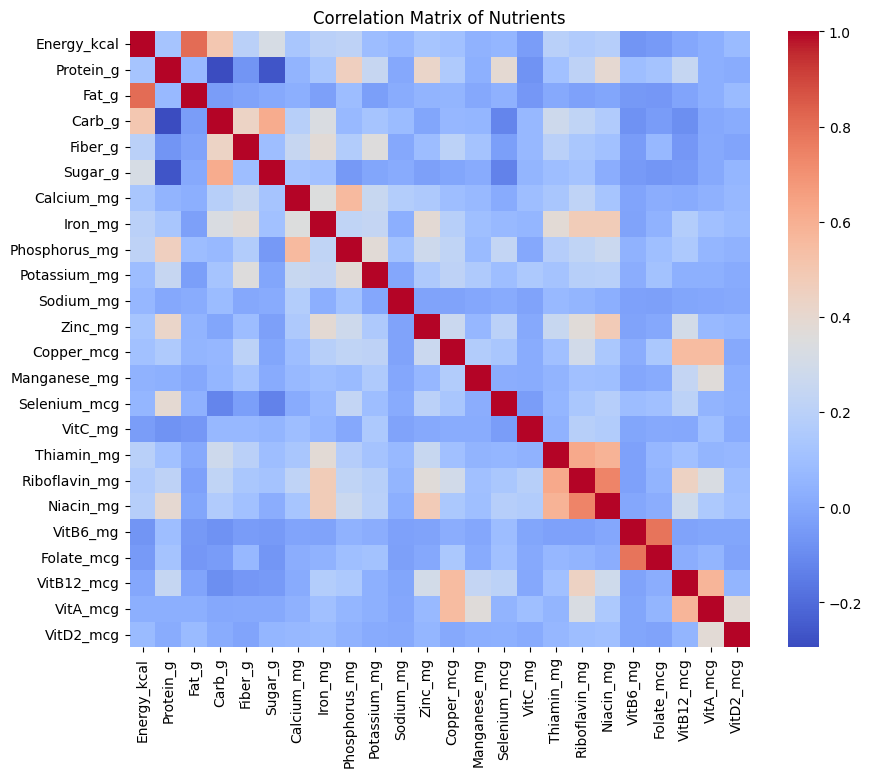

In [ ]:
# Correlation matrix of some selected nutrients
correlation_matrix = ingr_df[nutrient_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Nutrients')
plt.show()

In [ ]:
# Nutrient Density Analysis:
# Calculate nutrient density scores for various vitamins and minerals per calorie
# This can help identify superfoods or particularly nutrient-dense food items

# Eg. Nutrient density for Vitamin C per calorie
ingr_df['VitC_density'] = ingr_df['VitC_mg'] / ingr_df['Energy_kcal']

# Display the top 10 recipes with the highest VitC density
vitC_density = ingr_df[['Descrip', 'VitC_density']].sort_values(by='VitC_density', ascending=False).head(20)
print(vitC_density)


                                                Descrip  VitC_density
4435  beverages powerade zero ion4 calorie-free asso...           inf
4189  beverage  coca-cola co glaceau vit h2o revive ...           inf
4262                         beverages tea grn rtd diet           inf
2120                                  acerola juice raw         69.57
2119                   acerola (west indian cherry) raw         52.42
332   babyfood gerber 2nd foods appl carrot  squash ...         42.69
4263     beverages tea grn rtd citrus diet fort w vit c         39.30
4382  beverages orange-flavor drk brkfst type lo cal...         11.06
8971                                          goosberry         10.65
8710  bever fruit-flav drk pdr w hi vit c w other ad...         10.57
4286           beverages ocean spray diet cranberry juc          9.78
4295                 bev  ocean spray  cran cherry diet          8.20
8905                                   capsicum  green           7.57
8907                

# Join Ingredients from Ingredient Dataset and Recipe Dataset

To link each ingredient in recipes to their nutrition values, we need to match ingredients in recipes_df and ingr_df.

We use NLP method to get the embeddings and similarity score of ingredients in both datasets.\
Extract the highest similarity score for each ingredient in recipe_df, selecting the most similar ingredient description in ingredients_df.


In [21]:
# Install sentence-transformers
# import packages
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained sentence transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')



/Users/amyfang/anaconda3/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [22]:
# Generate embeddings for ingredients in `ingr_df`
ingredient_choices = ingr_df['Descrip'].tolist()
ingredient_embeddings = model.encode(ingredient_choices, convert_to_tensor=True)

In [23]:
# Function to get the best match and return both NDB_No and Descrip
def get_best_match_info(ingredient):
    # Embed the ingredient
    ingredient_embedding = model.encode(ingredient, convert_to_tensor=True)
    
    # Calculate cosine similarities with all ingredient descriptions
    similarity_scores = util.cos_sim(ingredient_embedding, ingredient_embeddings)
    
    # Get the best match index: finds the index of the highest similarity score
    best_match_idx = similarity_scores.argmax().item()
    
    # Retrieve the best match's NDB_No and Descrip
    best_match_row = ingr_df.iloc[best_match_idx]
    return best_match_row['NDB_No'], best_match_row['Descrip']


In [24]:
# Step 1: Get unique ingredients from `recipe_df`, based on exact spelling
all_ingredients = set([ingredient for sublist in recipes_df_cleaned['Ingredients'] for ingredient in sublist])
print(len(all_ingredients))

6954


In [25]:
# Step 2: Create a DataFrame with each unique ingredient
ingr_matching_df = pd.DataFrame({'Ingredient': list(all_ingredients)})

In [ ]:
# Step 3: Apply the matching function to each ingredient in the new DataFrame
ingr_matching_df[['NDB_No', 'Descrip']] = ingr_matching_df['Ingredient'].apply(
    lambda x: pd.Series(get_best_match_info(x))
)
# Ingredient: individual, unique ingredients appeared in recipes_df; NDB_No: the corresponding NDB_No in ingr_df; 
# Descrip: the corresponding description in ingr_df
ingr_matching_df

,Ingredient,NDB_No,Descrip
0,fresh portabella mushrooms,11265,mushrooms portabella raw
1,chinese jujube,9146,jujube raw
2,cucumbers,D044,cucumber green short
3,mostaccioli pasta,6931,sauce pasta spaghettimarinara rts
4,liquid sweetener,19912,sweetener syrup agave
...,...,...,...
6949,candied pecans,12142,pecans
6950,mahi mahi fillet,P033,maagaa
6951,dark soya sauce,9143,guava sauce cooked
6952,tempeh bacon,16104,bacon meatless


In [ ]:
# save recipes_df_cleaned, reviews_df_cleaned, ingr_df, ingr_matching_df, user_df to csv files
# reviews_df_cleaned.to_csv('reviews_cleaned.csv', index=False)
# user_df.to_csv('users.csv', index=False)
# ingr_df.to_csv('ingredients_cleaned.csv', index=False)
# ingr_matching_df.to_csv('ingredients_matching.csv', index=False)


In [53]:
recipes_df_cleaned.to_csv('recipes_cleaned.csv', index=False)